# Kernel SVM

O que acontece quando não podemos passar uma reta para dividir os grupos. Imagine que um grupo de observações está dentro de outro (uma ilha cercada), resumindo, imagine uma observação que **não é linear!**


## Higher-Dimensional Space

Imagine os seguintes dados em uma dimensão

<pre>
-----|--------X--X---X------0---0--0----X---X--X---> X1
     0                   5
</pre>

Podemos ver que os dados não são linearmente separáveis.

Como funciona o mapeamento. Encontre o ponto que o grupo muda (???) - isso será o ponto `f`

$$ f = x - 5 $$

Agora mova o ponto 0 para ser `f`:
<pre>
--------------X--X---X---|--0---0--0----X---X--X---> X1
                         0
</pre>

O próximo ponto `f` será:

$$ f = (x - 5)^2 $$

Isso vai criar uma parábola.

Projetamos os pontos nessa parábola e então conseguimos traçar uma linha, separando os grupos:


<pre>
            .                                .X.
             .                            .X.
              X                        X..
               .                    ...
                .X               ..0
                  ..          ..0
                    .X     .0. 
                       ....
--------------X--X---X---|--0---0--0----X---X--X---> X1
                         0
</pre>

A mesma coisa funciona em 2 dimensões, vamos criar uma terceira dimensão e conseguimos criar um hiperplano entre as dimensões.

<div class="alert alert-warning">
O problema desse algoritmo é que ele é caro, pois exige muitos cálculos matemáticos para poder gerar o hiperplano
</div>


### Gaussian RBF Kernel

Um truque para ajudar nesse problema é o _Gaussian RBF Kernel_

$$ \huge K (\overrightarrow{x}, \overrightarrow{l^i}) = e ^ \frac{||\overrightarrow{x}-\overrightarrow{l^i}||^2}{2\sigma^2}$$


`K` é o Kernel
`x` é o vetor x

`l` = landmark

`e` = expoente 
`|| ... |||` é a distancia
sigma é um parametro fixo

Imagine a imagem abaixo 

![alt text](svm_rbf_kernel.png)

[fonte](http://www.cs.toronto.edu/~duvenaud/cookbook/index.html)


`L`, o _landmark_ está no meio e é o ponto que medimos a distancia.

Imagina agora para calcular a distancia de um ponto:

![alt text](svm_rbf_kernel2.png)

Suponha que o resultado seja um número bem grande, quando elevamos ao quadrado, fica maior ainda. Esse número será negativo, o que derá um valor bem próximo de _zero_. Quanto mais longe do kernel, mais próximo de 0 ele fica.

![alt text](svm_rbf_kernel3.png)

Já para esse ponto, que a distância não é grande, o valor será próximo de 1.


<div class="alert alert-info">
Quanto mais perto do Kernel, o valor se aproxima de 1, quanto mais longe, ele se aproxima de 0!
</div>

No exemplo do curso, quando aplicamos a fórmula do RBF, temos o seguinte resultado:

![alt text](svm_rbf_kernel4.png)

De acordo que aumentamos o valor de `sigma`, a base do _vulcão_ vai aumentando, e se diminuir o valor de `sigma` ela vai se estreitando. Os valores que são 0 (base azul) são as observações da categoria vermelha, e o que não é 0, ou seja, mais próximas do kernel, são as observações da categoria verde.

Esse método permite achar grupos bem isolados, somando os kernels:

$$ \huge K(\overrightarrow{x}, \overrightarrow{l^1}) + K(\overrightarrow{x}, \overrightarrow{l^2}) $$

assim teremos várias _montanhas_. Se os pontos forem 0 nos dois Ks, então são do grupo vermelho, se é diferente de 0, então pertence ao grupo verde (no caso do exemplo acima).

### Outros tipos de Kernels

![Outros tipos de Kernels](svm_types_of_kernels.png)

Um site onde pode encontrar mais informações sobre os kernels é o [Machine Learning Kernels](http://mlkernels.readthedocs.io/en/stable/index.html)


## Python

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# Create the dataset and X and y datasets
dataset = pd.read_csv('Social_Network_Ads.csv')
X = dataset.iloc[:,[2,3]].values
y = dataset.iloc[:,4].values

In [4]:
# Split the dataset into train and test
from sklearn.cross_validation import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [5]:
# Feature Scalling - necessario para o SVR
from sklearn.preprocessing import StandardScaler

sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

/opt/anaconda3/lib/python3.5/site-packages/sklearn/utils/validation.py:420: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/opt/anaconda3/lib/python3.5/site-packages/sklearn/utils/validation.py:420: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/opt/anaconda3/lib/python3.5/site-packages/sklearn/utils/validation.py:420: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [6]:
# Fitting SVM to the Training set
from sklearn.svm import SVC

# Vamos usar o kernel RBD
# Se quiser variar o gamma, o parametro é gamma, que o valor padrão é 1/n_features
classifier = SVC(kernel = 'rbf', random_state = 0)

classifier.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=0, shrinking=True,
  tol=0.001, verbose=False)

In [7]:
# Predicting the test set results
y_pred = classifier.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 1])

### Evaluating the results

Criando a _Confusion Matrix_

In [8]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
cm

array([[64,  4],
       [ 3, 29]])

### Visualizando os resultados

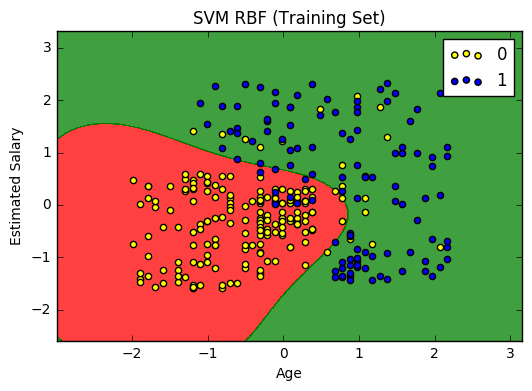

In [10]:
from matplotlib.colors import ListedColormap

X_set, y_set = X_train, y_train

X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() -1, stop = X_set[:, 0].max() +1, step = 0.01), 
np.arange(start = X_set[:, 1].min() -1, stop = X_set[:, 1].max() +1, step = 0.01))
    
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
            alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i,j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j,0], X_set[y_set == j, 1], c = ListedColormap(('yellow', 'blue'))(i), label = j)
    
plt.title('SVM RBF (Training Set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

* Os pontos são as pontos de observação do training set
* A região vermelha é a prevista de purchased 0 (não comprou) e a verde é 1 (que comprou)
* Pontos amarelos não compraram, e os azuis compraram

Observações:

* Os que tem pouca idade, e pouco salário, não compraram o carro
* Os mais velhos, e com salário maior, compraram o carro


Agora para os dados de teste:

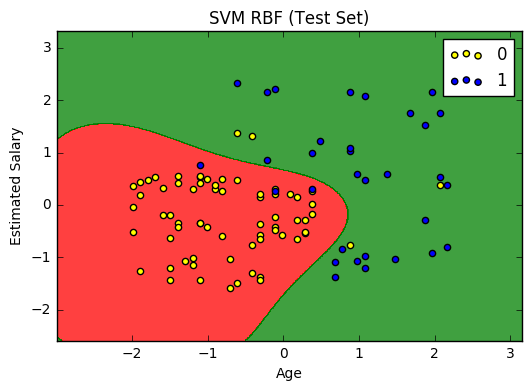

In [11]:
from matplotlib.colors import ListedColormap

X_set, y_set = X_test, y_test

# Pega o menor do valor do X_Set e do maior valor, e incrementa 0.01
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() -1, stop = X_set[:, 0].max() +1, step = 0.01), 
np.arange(start = X_set[:, 1].min() -1, stop = X_set[:, 1].max() +1, step = 0.01))

# Para cada pixel do grafico, aplica o predict, para pintar de vermelho ou verde
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
            alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i,j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j,0], X_set[y_set == j, 1], c = ListedColormap(('yellow', 'blue'))(i), label = j)
    
plt.title('SVM RBF (Test Set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()